In [2]:
#Run the process_fullKidneyMasks script
command1 = ('python process_fullKidneyMasks.py \
           --strRad 20 \
           --inputFolder "E:/AAV para enfermedades renales/LSFM combined images/Full images/MacroSPIM2/R1CLeft2021_0.5_Lectine" \
           --resultFolder "E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation/MacroSPIM2" \
           --kidneyThres 260 \
           --vessThres 900 \
           --sliceToVis 400 \
           --sliceBySlice False')

{command1}



^C


100%|██████████| 2498/2498 [2:05:39<00:00,  3.02s/it]


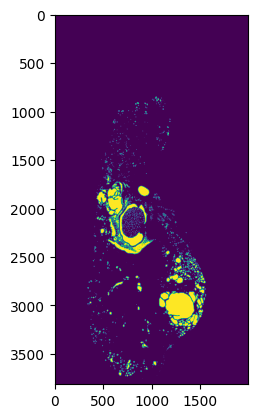

In [1]:
#Run the process_fullKidneyMasks script (from python)
from types import SimpleNamespace
from Kidneys_vessels.process_fullKidneyMasks import *

args = SimpleNamespace()


args.strRad = 20
args.inputFolder = "E:/AAV para enfermedades renales/LSFM combined images/Full images/MacroSPIM3/R6LEC-Path_0.5_Lectine"
args.resultFolder = "E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation/MacroSPIM3"
args.kidneyThres = 180
args.vessThres = 500



args.sliceToVis = 400
args.sliceBySliceThresholds = False
args.sliceBySliceErodeKidneyMask = True
args.radiusKidneyErosion = 50

#To apply morphological opening and closing slice by slice and avoid memory issues
args.processDimension = '3D'

processer = process_fullKidneyMasks(args)

processer.get_vessels_masks()
#processer.get_kidney_masks()


In [1]:
#Run connectcomponents function to convert a binary 3D mask saved as 2D slices
#into a 3D mask with connected components labeled with different intensities (saved again as 2D slices)

from connectComponents import *

connectComponents('E:\Github repositories\LSFM-processing-data\Cysts segmentation\MacroSPIM2\Corrected10-CystsMask-KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine',\
                  'E:\Github repositories\LSFM-processing-data\connectComponents-cysts\MacroSPIM2-VersionCorr2')

The image has 2367 slices
Connecting components...


2366it [52:28,  1.33s/it]

Elapsed time:  52.47338596185048  min


In [3]:
#Extract data from cysts:

from measureConComps import *
import tqdm as tqdm


measureConComps('E:\Github repositories\LSFM-processing-data\connectComponents-cysts\MacroSPIM2-VersionCorr2',\
                'E:\Github repositories\LSFM-processing-data\connectComponents-cysts',\
                startingSlice=3,dimension='2D',typeOfMask='cysts',saveSlices = False)


Elapsed time to load the image:  10.996448389689128  min


100%|██████████| 4445/4445 [00:00<00:00, 29971.60it/s]


Elapsed time to save all data in a txt:  0.9067519346872965  min
Elapsed time:  11.903200324376424  min


TypeError: 'module' object is not callable

In [1]:
#Run connectcomponents function

from connectComponents_and_measure import *

connectComponents_and_measure('E:\Github repositories\LSFM-processing-data\Cysts segmentation\MacroSPIM2\CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine',\
                  'E:\Github repositories\LSFM-processing-data\connectComponentsResults\Cysts\MacroSPIM2\CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine',\
                              'E:\Github repositories\LSFM-processing-data\connectComponentsResults\Cysts\MacroSPIM2',\
                                50)

Slice 0 labeled: 301 components
220 removed components
Slice 1 labeled: 278 components
79 overlapped components
197 removed components
Slice 2 labeled: 266 components
76 overlapped components
189 removed components
Slice 3 labeled: 200 components
62 overlapped components
136 removed components
Slice 4 labeled: 194 components
54 overlapped components
138 removed components
Slice 5 labeled: 181 components
45 overlapped components
131 removed components
Slice 6 labeled: 159 components
46 overlapped components
111 removed components
Slice 7 labeled: 153 components
39 overlapped components
106 removed components
Slice 8 labeled: 138 components
39 overlapped components
95 removed components
Slice 9 labeled: 119 components
36 overlapped components
77 removed components
Slice 10 labeled: 117 components
40 overlapped components
75 removed components
Slice 11 labeled: 128 components
39 overlapped components
86 removed components
Slice 12 labeled: 127 components
38 overlapped components
84 remove

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Github repositories\\LSFM-processing-data\\connectComponentsResults\\Cysts\\MacroSPIM2/CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine.txt'

In [1]:
#Apply GPU-accelerated morphological operations to the cysts masks

from Cysts.morphoProcessingGPU import *

morphoProcessingGPU('E:\Github repositories\LSFM-processing-data\Cysts segmentation\MacroSPIM2\CystsMask-KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine',\
                    'E:\Github repositories\LSFM-processing-data\Cysts segmentation\MacroSPIM2\Corrected10-CystsMask-KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine',\
                    strRad = 10, operation = 'open', dimension = '2D', startingSlice=0)

Elapsed time to load the image: 0.1551104148228963 min
Elapsed time to open the image: 9.002904446919759 min
Elapsed time to save the image as a stack of 2D slices: 4.653124821186066 min
Elapsed total time: 13.811156384150188 min


In [2]:
print(glob(folder+'\*'))

['E:/Github repositories/LSFM-processing-data/Cysts segmentation\\MacroSPIM3\\R2LEC-Path_0.5_Lectine', 'E:/Github repositories/LSFM-processing-data/Cysts segmentation\\MacroSPIM3\\R5LEC-Path_0.5_Lectine', 'E:/Github repositories/LSFM-processing-data/Cysts segmentation\\MacroSPIM3\\R6LEC-Path_0.5_Lectine']


In [1]:
#Loop through all the cysts masks and Apply GPU-accelelerated morphological opening + connect the components.

from Cysts.morphoProcessingGPU import *
from connectComponents import *
from glob import glob
import os

inputFolder = 'E:/Github repositories/LSFM-processing-data/Cysts segmentation'
outputFolder = 'D:/0 - Thesis Data/Cysts segmentations'

#Iterate through all the subfolders in the input folder
for folder in glob(inputFolder+'\*')[1:]:
    #For each of them, create a subfolder in the output folder
    folderName = os.path.basename(folder)

    if not os.path.exists(f'{outputFolder}/{folderName}'):
        os.makedirs(f'{outputFolder}/{folderName}')

    #Iterate through all the kidneys in the subfolde 
    for kidney in glob(folder+'\*'):
        kidneyName = os.path.basename(kidney)

        print(f'Processing kidney {kidneyName} from {folderName}')
        resultMaskPath = f'{outputFolder}/{folderName}/{kidneyName}'
        if not os.path.exists(resultMaskPath):
            os.makedirs(resultMaskPath)

        #Apply morphological opening and save a new mask
        print('Applying morphological opening...')
        morphoProcessingGPU(kidney,resultMaskPath,strRad = 10, operation = 'open', imDimension = '2D', processDimension = '3D', startingSlice=0)
        #Connect the components, rewriting the mask
        print('Connecting components...')
        connectComponents(resultMaskPath,resultMaskPath)                                                            


Processing kidney R2LEC-Path_0.5_Lectine from MacroSPIM3
Applying morphological opening...
Elapsed time to load the image: 4.40976204474767 min
Elapsed time to open the image: 9.110505239168804 min
Elapsed time to save the image as a stack of 2D slices: 12.828568963209788 min
Elapsed total time: 26.348852904637656 min
Connecting components...
The image has 2373 slices
Connecting components...


2372it [1:22:04,  2.08s/it]


Elapsed time:  82.15639362335205  min
Processing kidney R5LEC-Path_0.5_Lectine from MacroSPIM3
Applying morphological opening...
Elapsed time to load the image: 6.826914950211843 min
Elapsed time to open the image: 20.674145976702373 min
Elapsed time to save the image as a stack of 2D slices: 9.050554287433624 min
Elapsed total time: 36.55163188378016 min
Connecting components...
The image has 2506 slices
Connecting components...


2505it [2:43:44,  3.92s/it]


Elapsed time:  163.98755104144414  min
Processing kidney R6LEC-Path_0.5_Lectine from MacroSPIM3
Applying morphological opening...
Elapsed time to load the image: 2.9650400638580323 min
Elapsed time to open the image: 9.0988068262736 min
Elapsed time to save the image as a stack of 2D slices: 1.8845337828000386 min
Elapsed total time: 13.948380672931671 min
Connecting components...
The image has 2498 slices
Connecting components...


2497it [1:08:52,  1.65s/it]


Elapsed time:  68.91722249984741  min
Processing kidney S1_4.8x_2.5um_Red_FarRedStitched from MacroSPIM4
Applying morphological opening...
Elapsed time to load the image: 2.163084598382314 min
Elapsed time to open the image: 6.611025675137838 min
Elapsed time to save the image as a stack of 2D slices: 1.4484707752863566 min
Elapsed total time: 10.222614459196727 min
Connecting components...
The image has 2120 slices
Connecting components...


2119it [56:59,  1.61s/it]

Elapsed time:  57.02132210334142  min


In [1]:
#Loop through all the connected cysts masks and extract centroids and volumes of their connected components.

from measureConComps import *
from glob import glob
import os

inputFolder = 'D:/0 - Thesis Data/Cysts segmentations'


#Iterate through all the subfolders in the input folder
for folder in glob(inputFolder+'\*'):
    #For each of them, create a subfolder in the output folder
    folderName = os.path.basename(folder)

    #Iterate through all the kidneys in the subfolder
    for kidney in glob(folder+'\*'):
        kidneyName = os.path.basename(kidney)

        print(f'Processing kidney {kidneyName} from {folderName}')  

        #Extract centroids and volumes
        print('Extracting centroids and volumes...')
        measureConComps(kidney,folder,startingSlice=0,dimension='2D',typeOfMask='cysts',saveSlices = False)
        
           


Processing kidney CystsMask-KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  9.713373537858327  min


100%|██████████| 4445/4445 [00:00<00:00, 33693.97it/s]


Elapsed time to save all data in a txt:  0.9653989632924398  min
Elapsed time:  10.678789170583089  min
Processing kidney CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  8.427803778648377  min


100%|██████████| 4079/4079 [00:00<00:00, 28322.02it/s]


Elapsed time to save all data in a txt:  0.8788262446721394  min
Elapsed time:  9.306646664937338  min
Processing kidney R2LEC-Path_0.5_Lectine from MacroSPIM3
Extracting centroids and volumes...
Elapsed time to load the image:  9.53431395292282  min


100%|██████████| 12870/12870 [00:00<00:00, 32002.76it/s]


Elapsed time to save all data in a txt:  1.373680837949117  min
Elapsed time:  10.907994790871937  min
Processing kidney R5LEC-Path_0.5_Lectine from MacroSPIM3
Extracting centroids and volumes...
Elapsed time to load the image:  22.21367709239324  min


100%|██████████| 26058/26058 [00:01<00:00, 25472.95it/s]


Elapsed time to save all data in a txt:  16.565618288516998  min
Elapsed time:  38.779462067286175  min
Processing kidney R6LEC-Path_0.5_Lectine from MacroSPIM3
Extracting centroids and volumes...
Elapsed time to load the image:  10.493979907035827  min


100%|██████████| 9980/9980 [00:00<00:00, 27264.92it/s]


Elapsed time to save all data in a txt:  1.1982922395070394  min
Elapsed time:  11.692272146542868  min
Processing kidney S1_4.8x_2.5um_Red_FarRedStitched from MacroSPIM4
Extracting centroids and volumes...
Elapsed time to load the image:  6.7329370697339375  min


100%|██████████| 5411/5411 [00:00<00:00, 29760.76it/s]


Elapsed time to save all data in a txt:  0.9754776914914449  min
Elapsed time:  7.708414761225383  min


In [1]:
#Apply GPU-accelerated slice by slice closing to remove holes from the kidney mask
from Cysts.morphoProcessingGPU import *

kidneyPath = 'E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation/MacroSPIM1/kidneyMask-Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20'
resultMaskPath = 'D:/0 - Thesis Data/Corrected kidney segmentations/MacroSPIM1/kidneyMask-Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20'

morphoProcessingGPU(kidneyPath,resultMaskPath,strRad = 200, operation = 'close',reScaleProp=0.25, imDimension = '2D', processDimension = '3D', startingSlice=0)

Elapsed time to load the image: 0.18244329293568928 min
Elapsed time to close the image: 36.38172146081924 min
Elapsed time to save the image as a stack of 2D slices: 1.8359469294548034 min
Elapsed total time: 38.40011168320974 min


In [4]:
from measureConComps import *


measureConComps('D:/0 - Thesis Data/Corrected kidney segmentations/MacroSPIM2/kidneyMask-R2Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20',\
                'D:/0 - Thesis Data/Corrected kidney segmentations/MacroSPIM2',\
                reScaleProp=0.25,dimension='2D',inertiaTensEigen = True)

Elapsed time to load the image:  2.7349481185277305  min


100%|██████████| 1/1 [00:00<00:00, 998.64it/s]


Elapsed time to save all data in a txt:  0.3344026883443197  min
Elapsed time:  3.0693674604098002  min


In [4]:
mainInputFolder = 'E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation'
mainOutputFolder = 'D:/0 - Thesis Data/Corrected kidney segmentations'

mainInputFolders = glob(mainInputFolder+'\*')

for inputFolder in mainInputFolders:
    print(inputFolder)

E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation\Important data on full kidney and vessels segmentation.txt
E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation\MacroSPIM1
E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation\MacroSPIM2
E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation\MacroSPIM3


In [1]:
#Loop through all the kidney masks and apply slice by slice closing to remove holes from the kidney mask
#Then, generate a csv file with the centroid, area and inertia tensor eigenvalues of each kidney

from Cysts.morphoProcessingGPU import *
from measureConComps import *
import os
from glob import glob

mainInputFolder = 'E:/Github repositories/LSFM-processing-data/Full kidney and vessels segmentation'
mainOutputFolder = 'D:/0 - Thesis Data/Corrected kidney segmentations'

mainInputFolders = glob(mainInputFolder+'\*')

#For each of the main batches (MacroSPIM1, MacroSPIM2, MacroSPIM3)
for inputFolder in mainInputFolders[1:]:

    folderName = os.path.basename(inputFolder)
    print(f'Processing folder {folderName}')

    #Define the corresponding output folder
    outputFolder = f'{mainOutputFolder}/{folderName}'

    #Get a list with all kidney masks folders in the directory
    thingsInDir = glob(inputFolder+'\*')
    foldersInDir = [thing for thing in thingsInDir if 'kidneyMask' in os.path.basename(thing)]
    
    #For each kidney mask in the folder
    for i,kidneyPath in enumerate(foldersInDir):
        try:
            #Process the kidney mask
            kidneyName = os.path.basename(kidneyPath)
            print(f'Processing {kidneyName}')

            #Define the output folder
            resultMaskPath = f'{outputFolder}/{kidneyName}'

            #Close the kidney mask using 200 as radius
            morphoProcessingGPU(kidneyPath,resultMaskPath,strRad=200, operation = 'close',reScaleProp=0.25, imDimension = '2D', processDimension = '3D')

            #Extract the centroids, areas and inertia tensor eigenvalues and save them in a txt file
            measureConComps(resultMaskPath,outputFolder,reScaleProp=0.25,dimension='2D',inertiaTensEigen = True)
        except Exception as e:
            print('Moving pass error')
            print(repr(e))
            continue

Processing folder MacroSPIM2
Processing kidneyMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 4.982952765623728 min
Elapsed time to close the image: 58.65850830078125 min
Processing kidneyMask-R1CLeft2021_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 3.4809845288594565 min
Elapsed time to close the image: 53.92124327818553 min
Processing kidneyMask-R1CRight2021_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 4.385297854741414 min
Elapsed time to close the image: 56.96625862916311 min
Processing kidneyMask-R1Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 4.0004813313484195 min
Elapsed time to close the image: 52.03367371956507 min
Elapsed time to save the image as a stack of 2D slices: 3.541626302401225 min
Elapsed total time: 59.57579802274704 min
Elapsed time to load the image:  2.973959231376648  min


100%|██████████| 1/1 [00:00<?, ?it/s]


Elapsed time to save all data in a txt:  0.3994977831840515  min
Elapsed time:  3.3734570145606995  min
Processing kidneyMask-R1Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 4.626899639765422 min
Elapsed time to close the image: 61.65306982596715 min
Elapsed time to save the image as a stack of 2D slices: 4.829388324419657 min
Elapsed total time: 71.1093666156133 min
Elapsed time to load the image:  2.504095216592153  min


100%|██████████| 1/1 [00:00<?, ?it/s]


Elapsed time to save all data in a txt:  0.4729405204455058  min
Elapsed time:  2.977035737037659  min
Processing kidneyMask-R2Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 3.590426135063171 min
Elapsed time to close the image: 42.792278250058494 min
Processing kidneyMask-R2Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 3.7071059226989744 min
Elapsed time to close the image: 42.08631945053737 min
Elapsed time to save the image as a stack of 2D slices: 2.5894875645637514 min
Elapsed total time: 48.382921834786735 min
Elapsed time to load the image:  1.6643895745277404  min


100%|██████████| 1/1 [00:00<?, ?it/s]


Elapsed time to save all data in a txt:  0.32016200621922813  min
Elapsed time:  1.9845515807469687  min
Processing folder MacroSPIM3
Processing kidneyMask-R2LEC-Path_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 6.232961062590281 min
Elapsed time to close the image: 65.0536852478981 min
Elapsed time to save the image as a stack of 2D slices: 6.042981612682342 min
Elapsed total time: 77.32964457273484 min
Elapsed time to load the image:  0.7932854135831197  min


100%|██████████| 1/1 [00:00<?, ?it/s]


Elapsed time to save all data in a txt:  0.5979124824206035  min
Elapsed time:  1.3911978960037232  min
Processing kidneyMask-R6LEC-Path_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image: 5.114076455434163 min
Elapsed time to close the image: 64.41174487272899 min
Elapsed time to save the image as a stack of 2D slices: 2.84330317179362 min
Elapsed total time: 72.36912449995677 min
Elapsed time to load the image:  1.2478826840718586  min


100%|██████████| 1/1 [00:00<?, ?it/s]


Elapsed time to save all data in a txt:  0.5806517640749613  min
Elapsed time:  1.82853444814682  min


In [1]:
#Loop through several full kidney masks and erode them in 3D using as radius for the structuring element
#half the smallest principal axis of the kidney mask, to approximately remove the cortex.

from Cysts.morphoProcessingGPU import *
from glob import glob
import os
import pandas as pd
import numpy as np

mainInputFolder = 'D:/0 - Thesis Data/Corrected kidney segmentations'
mainOutputFolder = 'D:/0 - Thesis Data/Kidney interior segmentations'

mainInputFolders = glob(mainInputFolder+'\*')

#For each of the main batches (MacroSPIM1, MacroSPIM2, MacroSPIM3)
for inputFolder in mainInputFolders[1:]:

    folderName = os.path.basename(inputFolder)
    print(f'Processing folder {folderName}')

    #Define the corresponding output folder
    outputFolder = f'{mainOutputFolder}/{folderName}'

    #Get a list with all folders in the directory and another one with all files
    thingsInDir = glob(inputFolder+'\*')

    foldersInDir = [thing for thing in thingsInDir if os.path.isdir(thing)]
    filesInDir = [thing for thing in thingsInDir if os.path.isfile(thing)]

    #For each kidney mask in the folder
    for i,kidneyPath in enumerate(foldersInDir):
        try:
            #Process the kidney mask
            kidneyName = os.path.basename(kidneyPath)
            print(f'Processing {kidneyName}')

            #Get the corresponding data file (with the same order as the kidney mask)
            dataFilePath = filesInDir[i]

            #Define the output folder
            resultMaskPath = f'{outputFolder}/{kidneyName}'

            #Read the data file
            data = pd.read_csv(dataFilePath)

            #Get the principal axes lengths from the inertia tensor eigenvalues
            principalAxesLengths = [np.sqrt(data['inertia_tensor_eigvals-0']),np.sqrt(data['inertia_tensor_eigvals-1']),np.sqrt(data['inertia_tensor_eigvals-2'])]
            #Get the minimum principal axis length
            minPrincipalAxis = int(np.min(principalAxesLengths))
            strRad = minPrincipalAxis/2

            print(f'Minimum principal axis length: {minPrincipalAxis}')
            print(f'Erosion radius: {strRad}')

            #Erode the kidney mask using half the minimum principal axis length as radius
            morphoProcessingGPU(kidneyPath,resultMaskPath,strRad, operation = 'erode',reScaleProp=0.25, imDimension = '2D', processDimension = '3D')
        except Exception as e:
            print('Moving pass error')
            print(repr(e))
            continue

Processing folder MacroSPIM2
Processing kidneyMask-R1CRight2021_0.5_Lectine_pygorpho_strRad_20
Minimum principal axis length: 604
Erosion radius: 302.0
Elapsed time to load the image: 3.997143507003784 min
Elapsed time to erode the image: 33.191319958368936 min
Moving pass error
IndexError('list index out of range')
Processing kidneyMask-R1Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Minimum principal axis length: 548
Erosion radius: 274.0
Elapsed time to load the image: 5.869778529802958 min
Elapsed time to erode the image: 23.55908600886663 min
Elapsed time to save the image as a stack of 2D slices: 3.24469895362854 min
Elapsed total time: 32.67358017365138 min
Processing kidneyMask-R1Right_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Minimum principal axis length: 594
Erosion radius: 297.0
Elapsed time to load the image: 6.460703011353811 min
Elapsed time to erode the image: 32.93025394280752 min
Elapsed time to save the image as a stack of 2D slices: 3.9370761354764303 min
E

In [4]:
#Create txt files counting how many centroids are in the inner region

from Inner_region.countCentroidsInner import *

mainPathInnerMask = 'D:/0 - Thesis Data/Kidney interior segmentations'
mainPathCentroids = 'E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation' 

countCentroidsInner(mainPathInnerMask,mainPathCentroids,type = 'glomeruli')

Scanning folder:  MacroSPIM2
Scanning folder:  MacroSPIM3
Reading mask:  D:/0 - Thesis Data/Kidney interior segmentations/MacroSPIM3/kidneyMask-R6LEC-Path_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image:  2.2981613159179686  min
Elapsed time to check how many centroids in the inner region:  0.0006955663363138834  min


In [3]:
#Create txt files measuring the volume of the inner regions

from Kidneys_vessels.measureVolumeBinary import *

from glob import glob
import os

mainInputFolder = 'D:/0 - Thesis Data/Kidney interior segmentations'

mainInputFolders = glob(mainInputFolder+'\*')

#For each of the main batches (MacroSPIM1, MacroSPIM2, MacroSPIM3)
for inputFolder in mainInputFolders:

    folderName = os.path.basename(inputFolder)
    print(f'Processing folder {folderName}')

    #Get a list with all folders in the directory and another one with all files
    thingsInDir = glob(inputFolder+'\*')

    foldersInDir = [thing for thing in thingsInDir if os.path.isdir(thing)]
    filesInDir = [thing for thing in thingsInDir if os.path.isfile(thing)]

    #For each kidney mask in the folder
    for i,kidneyPath in enumerate(foldersInDir):

        #Define the mask's name
        kidneyName = os.path.basename(kidneyPath)
        print(f'Processing {kidneyName}')

        #Measure the nonzero volume (in voxels)
        measureVolumeBinary(kidneyPath)

Processing folder MacroSPIM1
Processing kidneyMask-Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image:  2.6087196985880534  min
Elapsed time calculate nonzero volume:  0.034302906195322676  min
Elapsed total time:  2.643022604783376  min
Processing kidneyMask-Kidney1_izq_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20
Elapsed time to load the image:  1.9561962326367697  min
Elapsed time calculate nonzero volume:  0.021982268492380778  min
Elapsed total time:  1.9781785011291504  min
Processing folder MacroSPIM2
Processing kidneyMask-KidneyR2Left_LectinRed_LRSamples2021_0.5_Lectine_pygorpho_strRad_20


KeyboardInterrupt: 